In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#new algo
from sklearn.linear_model import LogisticRegression



In [2]:
#Read the data
df1=pd.read_csv('True.csv')
df2=pd.read_csv('Fake.csv')
#Get shape and head
df = pd.concat([df1,df2], ignore_index=True)
df.shape
df.head()
#print(df.shape[0],df.shape[1],"row and columns",df.shape)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text label  
0  WASHINGTON (Reuters) - The head of a conservat...  REAL  
1  WASHINGTON (Reuters) - Transgender people will...  REAL  
2  WASHINGTON (Reuters) - The special counsel inv...  REAL  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  REAL  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  REAL

In [3]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    REAL
1    REAL
2    REAL
3    REAL
4    REAL
Name: label, dtype: object

In [4]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2,random_state=10)
#print(len(x_train),len(x_test))
#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)
#x_test=["biggest",
 #      'frenquetly']

In [5]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
#print(tfidf_train.shape)
#print(tfidf_test.shape)
#print(tfidf_test)
#print(tfidf_vectorizer.get_feature_names())

In [6]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=LogisticRegression()
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
#print(y_pred,y_test)
matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
#TP FN
#FP TN

In [7]:
score=accuracy_score(y_test,y_pred)
print("Accuracy=",score*100)

Accuracy= 98.59484777517564


In [8]:
precision = matrix[0][0] / (matrix[0][0]+matrix[1][0])
print("Precision=",precision*100)
recall= matrix[0][0] / (matrix[0][0]+matrix[0][1])
print("Recall=",recall*100)
f_measure = (2*precision*recall) / (precision + recall)
print("F-Measure=",f_measure*100)

Precision= 99.04926534140017
Recall= 98.24260608658379
F-Measure= 98.6442866365397


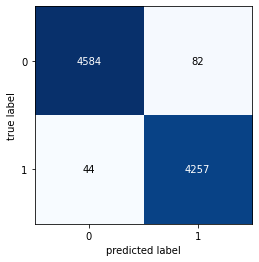

In [9]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()